# The Chaboche mecanical model

## Deterministic model

The Chaboche mecanical law predicts the stress depending on the strain:
$$
\sigma = G(\epsilon,R,C,\gamma) = R + \frac{C}{\gamma} (1-\exp(-\gamma\epsilon))
$$

where:

- $\epsilon$ is the strain,
- $\sigma$ is the stress (Pa),
- $R$, $C$, $\gamma$ are the parameters.


## References

- J. Lemaitre and J. L. Chaboche (2002) "Mechanics of solid materials" Cambridge University Press.

## Taylor expansion of the stress

The analysis is based on the hypothesis that the strain $\epsilon$ is close to zero:
$$
\epsilon \approx 0.
$$

The Taylor expansion of the exponential function is:
$$
\exp(x) = 1 + x + \frac{x^2}{2} + O(x^3), \quad x\rightarrow 0.
$$
Hence, 
$$
\exp(-\gamma \epsilon) = 1 - \gamma \epsilon + \frac{\gamma^2}{2} \epsilon^2 + O(\epsilon^3), \quad \epsilon\rightarrow 0,
$$
which implies:
$$
1 - \exp(-\gamma \epsilon) =  \gamma \epsilon - \frac{\gamma^2}{2} \epsilon^2 + O(\epsilon^3), \quad \epsilon\rightarrow 0.
$$
Therefore,
$$
\frac{1}{\gamma}\left(1 - \exp(-\gamma \epsilon)\right) =  \epsilon - \frac{\gamma}{2} \epsilon^2 + O(\epsilon^3), \quad \epsilon\rightarrow 0.
$$
This leads to the Taylor expansion of the stress:
$$
\sigma = R + C\epsilon - \frac{C\gamma}{2} \epsilon^2 + O(\epsilon^3), 
\quad \epsilon\rightarrow 0.
$$
This shows that:
* the coefficient $R$ is a constant stress,
* the coefficient $C$ is the linear part depending on the strain,
* the coefficient $\gamma$ is the quadratic part, as a multiplication factor of $C$.

The quadratic term involves the product $C\gamma$. In other words, there are interactions with the parameters $C$ and $\gamma$ and the stress $\sigma$ does not depend linearily on the $\gamma$ parameter. 

## Partial derivatives

The partial derivatives of the stress $\sigma$ with respect to its inputs are:

$$
\frac{\partial \sigma}{\partial \epsilon} = C \exp(-\gamma\epsilon),
$$
$$
\frac{\partial \sigma}{\partial R} = 1,
$$
$$
\frac{\partial \sigma}{\partial C} = 
\frac{1}{\gamma} \left(1-\exp(-\gamma\epsilon)\right),
$$
$$
\frac{\partial \sigma}{\partial \gamma} = 
- \frac{C}{\gamma^2} \left(1-\exp(-\gamma\epsilon)\right) 
+ \frac{C\epsilon}{\gamma} \exp(-\gamma\epsilon). 
$$

## Check the derivatives

In [1]:
import openturns as ot
import numpy as np

Define the model.

In [2]:
def modelChaboche(X):
    strain, r, c, gamma = X
    stress = r + c * (1 - np.exp(-gamma * strain)) / gamma
    return [stress]

Create the Python function.

In [3]:
g = ot.PythonFunction(4, 1, modelChaboche)

In [4]:
strain = 0.07
r = 750e6
c = 2750e6
gamma = 10.0

In [5]:
X = ot.Point([strain, r, c, gamma])
g.gradient(X)

class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=4 columns=1 values=[1.36561e+09,1.00136,0.0476837,-4.28464e+06]

In [6]:
def modelChabocheGradient(X):
    strain, r, c, gamma = X
    J = ot.Matrix(4, 1)
    J[0, 0] = c * np.exp(-gamma * strain)  # epsilon
    J[1, 0] = 1.0  # r
    J[2, 0] = (1.0 - np.exp(-gamma * strain)) / gamma  # c
    J[3, 0] = (
        -c * (1.0 - np.exp(-gamma * strain)) / gamma**2
        + c * strain * np.exp(-gamma * strain) / gamma
    )  # gamma
    return J

In [7]:
modelChabocheGradient(X)

class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=4 columns=1 values=[1.36561e+09,1,0.0503415,-4.28464e+06]

In [8]:
g = ot.SymbolicFunction(
    ["strain", "r", "c", "gamm"], ["r+c*(1-exp(-gamm*strain))/gamm"]
)

In [9]:
X = ot.Point([strain, r, c, gamma])
g.gradient(X)

class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=4 columns=1 values=[1.36561e+09,1,0.0503415,-4.28464e+06]

In [10]:
g = ot.SymbolicFunction(
    ["strain", "r", "c", "gamm"], ["r+c*strain-0.5*c*gamm*strain^2"]
)

In [11]:
X = ot.Point([strain, r, c, gamma])
g.gradient(X)

class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=4 columns=1 values=[8.25e+08,1,0.0455,-6.7375e+06]

## Accuracy issue

We know that there might be an accuracy issue when evaluating $\exp(x)-1$ for $x$ close to zero. This, however, only happens when $x$ is very close to zero. 

In [12]:
strain = 0.07
gamma = 10.0

In [13]:
np.exp(-gamma * strain) - 1.0

-0.5034146962085906

In [14]:
np.expm1(-gamma * strain)

-0.5034146962085905

It seems that there is no significant accuracy issue here. 

## Implementation Python or Symbolic?

In [15]:
def modelChaboche(X):
    strain, r, c, gamma = X
    stress = r + c * (1 - np.exp(-gamma * strain)) / gamma
    return [stress]

In [16]:
gPython = ot.PythonFunction(4, 1, modelChaboche)

In [17]:
strain = 0.07
r = 750e6
c = 2750e6
gamma = 10.0
X = ot.Point([strain, r, c, gamma])

In [18]:
gPython(X)

class=Point name=Unnamed dimension=1 values=[8.88439e+08]

In [19]:
gSymbolic = ot.SymbolicFunction(
    ["strain", "r", "c", "gamm"], ["r+c*(1-exp(-gamm*strain))/gamm"]
)

In [20]:
gSymbolic(X)

class=Point name=Unnamed dimension=1 values=[8.88439e+08]

## Dependence on strain

In [21]:
strain = 0.07
r = 750e6
c = 2750e6
gamma = 8.0  # Exact : 10
theta = ot.Point([r, c, gamma])

In [22]:
calibratedIndices = [1, 2, 3]
mycf = ot.ParametricFunction(g, calibratedIndices, theta)

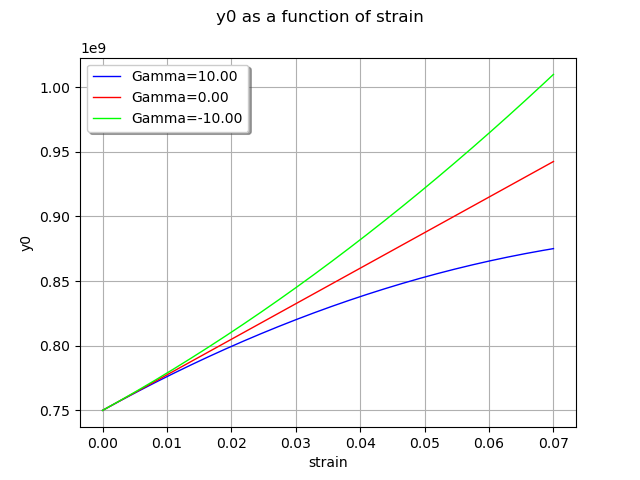

In [23]:
# Gamma = 10.
theta1 = ot.Point([r, c, 10.0])
mycf.setParameter(theta1)
graph = mycf.draw(0, strain)
graph.setLegends(["Gamma=%.2f" % theta1[2]])
# Gamma = 0.
theta2 = ot.Point([r, c, 0.0])
mycf.setParameter(theta2)
graph2 = mycf.draw(0, strain)
graph2.setColors(["red"])
graph2.setLegends(["Gamma=%.2f" % theta2[2]])
graph.add(graph2)
# Gamma = -10.
theta3 = ot.Point([r, c, -10.0])
mycf.setParameter(theta3)
graph3 = mycf.draw(0, strain)
graph3.setColors(["green"])
graph3.setLegends(["Gamma=%.2f" % theta3[2]])
graph.add(graph3)
#
graph.setLegendPosition("topleft")
graph